# Autoencoder
https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

## Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = data.drop('Class', axis=1)
y = data.Class

X_sca_MM = MinMaxScaler().fit_transform(X.values)
X_sca_R = RobustScaler().fit_transform(X.values)
X_sca_Std = StandardScaler().fit_transform(X.values)

## Create network

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

print(tf.__version__)

2.0.0


In [5]:
input_dim = X.shape[1]

## input layer 
input_layer = Input(shape=(input_dim,)) # num_features

## encoding part
encoded = Dense(500, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

## decoding part
decoded = Dense(10, activation='tanh')(encoded)
decoded = Dense(20, activation='tanh')(decoded)

## output layer
output_layer = Dense(input_dim, activation='relu')(decoded)

In [36]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(learning_rate=0.002, optimizer="adadelta", loss="mse")

In [37]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               15500     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1255      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                630 

## Train Network

In [38]:
X_inp = X_sca_Std # allows us to switch between different scaling methods

In [39]:
X_norm, X_fraud = X_inp[y == 0], X_inp[y == 1]

In [50]:
num_train_samples = 10000

autoencoder.fit(X_norm[:num_train_samples], X_norm[:num_train_samples], 
                batch_size=64, epochs=200, 
                shuffle=True, validation_split=0.20);

Train on 8000 samples, validate on 2000 samples
Epoch 1/200
8000/8000 [==============================] - 1s 127us/sample - loss: 1.0311 - val_loss: 1.0442
Epoch 2/200
8000/8000 [==============================] - 1s 89us/sample - loss: 1.0309 - val_loss: 1.0438
Epoch 3/200
8000/8000 [==============================] - 1s 81us/sample - loss: 1.0307 - val_loss: 1.0434
Epoch 4/200
8000/8000 [==============================] - 1s 83us/sample - loss: 1.0304 - val_loss: 1.0430
Epoch 5/200
8000/8000 [==============================] - 1s 81us/sample - loss: 1.0302 - val_loss: 1.0426
Epoch 6/200
8000/8000 [==============================] - 1s 99us/sample - loss: 1.0300 - val_loss: 1.0421
Epoch 7/200
8000/8000 [==============================] - 1s 84us/sample - loss: 1.0297 - val_loss: 1.0417
Epoch 8/200
8000/8000 [==============================] - 1s 76us/sample - loss: 1.0295 - val_loss: 1.0413
Epoch 9/200
8000/8000 [==============================] - 1s 96us/sample - loss: 1.0292 - val_loss: 1.04

8000/8000 [==============================] - 1s 77us/sample - loss: 1.0131 - val_loss: 1.0126
Epoch 78/200
8000/8000 [==============================] - 1s 84us/sample - loss: 1.0129 - val_loss: 1.0123
Epoch 79/200
8000/8000 [==============================] - 1s 97us/sample - loss: 1.0127 - val_loss: 1.0119
Epoch 80/200
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0125 - val_loss: 1.0115
Epoch 81/200
8000/8000 [==============================] - 1s 72us/sample - loss: 1.0123 - val_loss: 1.0111
Epoch 82/200
8000/8000 [==============================] - 1s 89us/sample - loss: 1.0120 - val_loss: 1.0107
Epoch 83/200
8000/8000 [==============================] - 1s 72us/sample - loss: 1.0118 - val_loss: 1.0103
Epoch 84/200
8000/8000 [==============================] - 1s 75us/sample - loss: 1.0116 - val_loss: 1.0100
Epoch 85/200
8000/8000 [==============================] - 1s 68us/sample - loss: 1.0114 - val_loss: 1.0096
Epoch 86/200
8000/8000 [==========================

8000/8000 [==============================] - 1s 70us/sample - loss: 0.9971 - val_loss: 0.9836
Epoch 154/200
8000/8000 [==============================] - 1s 70us/sample - loss: 0.9969 - val_loss: 0.9832
Epoch 155/200
8000/8000 [==============================] - 1s 72us/sample - loss: 0.9967 - val_loss: 0.9828
Epoch 156/200
8000/8000 [==============================] - 1s 70us/sample - loss: 0.9965 - val_loss: 0.9824
Epoch 157/200
8000/8000 [==============================] - 1s 69us/sample - loss: 0.9963 - val_loss: 0.9820
Epoch 158/200
8000/8000 [==============================] - 1s 69us/sample - loss: 0.9961 - val_loss: 0.9816
Epoch 159/200
8000/8000 [==============================] - 1s 69us/sample - loss: 0.9960 - val_loss: 0.9812
Epoch 160/200
8000/8000 [==============================] - 1s 71us/sample - loss: 0.9958 - val_loss: 0.9809
Epoch 161/200
8000/8000 [==============================] - 1s 70us/sample - loss: 0.9956 - val_loss: 0.9805
Epoch 162/200
8000/8000 [=================

## Get latent representation

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

from MulticoreTSNE import MulticoreTSNE as TSNE

def plot_cluster(X, y, title='t_SNE'):    
    X = TSNE(n_components=2, random_state=0).fit_transform(X)
    fig = plt.figure(figsize=(12, 12))
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==0), label='No Fraud', linewidth=2)
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==1), label='Fraud', linewidth=2)
    plt.title(title, fontsize=14)
    plt.show()

In [52]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [53]:
norm_latent = hidden_representation.predict(X_norm[:3000])
fraud_latent = hidden_representation.predict(X_fraud)

In [54]:
rep_x = np.append(norm_latent, fraud_latent, axis = 0)
y_n = np.zeros(norm_latent.shape[0])
y_f = np.ones(fraud_latent.shape[0])
rep_y = np.append(y_n, y_f)

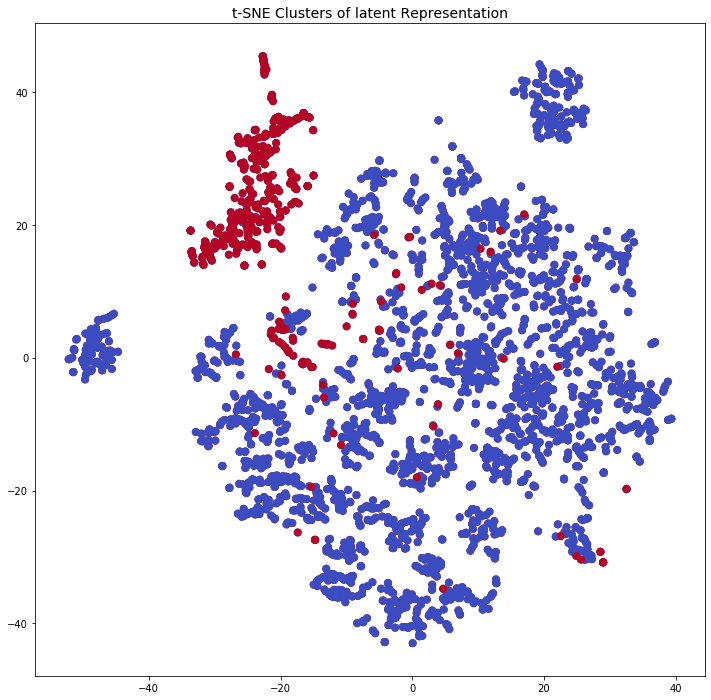

In [55]:
plot_cluster(rep_x, rep_y, title='t-SNE Clusters of latent Representation')

## Classify

In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [57]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25, random_state=42)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("Classification Report:\n")
print (classification_report(val_y, pred_y))

print (f"Accuracy: {accuracy_score(val_y, pred_y)}")

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       748
         1.0       1.00      0.94      0.97       125

    accuracy                           0.99       873
   macro avg       0.99      0.97      0.98       873
weighted avg       0.99      0.99      0.99       873

Accuracy: 0.9908361970217641
